<a href="https://colab.research.google.com/github/KsiuTretyakova/MachineLearning/blob/main/Sup_Unsup_Learning/Sup_Unsup_Learning(sport).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Аналіз спортивної команди"  

Опис проєкту: Проєкт допомагає зрозуміти, як тренування впливають на результати гри команди, а також розподілити гравців за їхніми здібностями, щоб оптимізувати тренувальний процес.

1. Лінійна регресія: Прогноз очок у грі  
Лінійна регресія використовується для передбачення результатів гри на основі тренувань.  

Мета: Прогнозувати кількість очок команди залежно від часу тренувань.  

Дані:
Training Hours (Години тренувань).  
Game Points (Очки у грі).  

2. Кластеризація: Розподіл гравців за здібностями  

Кластеризація допомагає сегментувати гравців для оптимізації тренувань.  

Мета: Групувати гравців за їхніми фізичними та ігровими показниками:  
Speed (Швидкість).  
Stamina (Витривалість).  

Результат: Гравці розподілені в 3 категорії:  
Швидкі та витривалі.  
Середні за характеристиками.  
Низька швидкість і витривалість.

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. Лінійна регресія: Прогноз очок у грі

Гернеруємо дані

In [3]:
np.random.seed(42)
training_hours = np.random.randint(1, 8, 30)
game_points = 10 * training_hours + np.random.randint(0, 30, 30)

print("training_hours:", training_hours, len(training_hours))
print("game_points:", game_points, len(game_points))

training_hours: [7 4 5 7 3 5 5 7 2 3 7 3 3 5 4 3 6 5 2 4 6 6 2 4 5 1 4 2 6 5] 30
game_points: [81 64 66 96 56 59 77 97 35 44 99 59 44 79 58 41 82 69 44 42 64 78 26 60
 58 16 57 23 84 77] 30


In [5]:
data = {
    "training_hours": training_hours,
    "game_points": game_points
}

df = pd.DataFrame(data)

print(df.head(10))

   training_hours  game_points
0               7           81
1               4           64
2               5           66
3               7           96
4               3           56
5               5           59
6               5           77
7               7           97
8               2           35
9               3           44


Поділ даних на тренувальні та тестувальні

In [12]:
X = df[["training_hours"]]
y = df["game_points"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
    )

print(len(X_train), len(X_test), len(y_train), len(y_test))

24 6 24 6


Модель

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

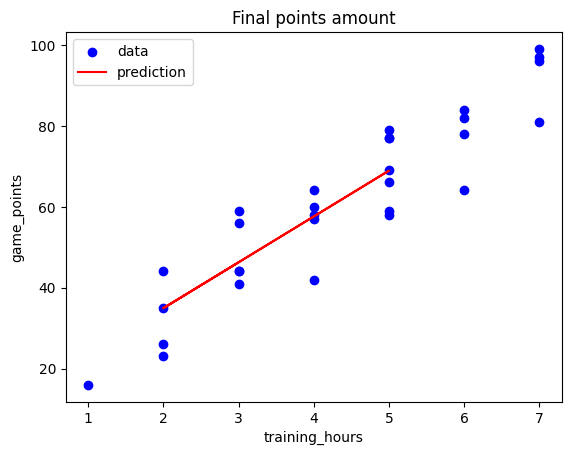

In [14]:
plt.scatter(X, y, color="blue", label="data")
plt.plot(X_test, y_pred, color="red", label="prediction")
plt.title("Final points amount")
plt.xlabel("training_hours")
plt.ylabel("game_points")
plt.legend()
plt.show()